In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, tree, datasets
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_validate

from skimage import io
from skimage.filters import gaussian
from skimage.transform import resize
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
class DataSet:
    def __init__(self, inputs=None, targets=None):
        self.inputs = [] if inputs is None else inputs
        self.targets = [] if targets is None else targets


if __name__ == '__main__':
    dataset = DataSet()
    print('Loading Training Data...')
    labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down', ]

    # TODO: need to shuffle data before partitioning
    # 75% to train
    for i in range(10):
        for label in labels:
            for j in range(1, 151):  # 201):
                label.split()
                image = io.imread('data/leapGestRecog/0' +
                                  str(i) + '/' +
                                  label + '/frame_0' +
                                  str(i) + '_' +
                                  label[0:2] + '_' +
                                  str(j).zfill(4) + '.png')
                # TODO: should we flatten or resize here?
                img_blurred = gaussian(image, sigma=1.65)
                dataset.inputs.append(resize(img_blurred, (60, 160), preserve_range=True).flatten())
                dataset.targets.append(label)

    # shuffle data
    x_train, y_train = shuffle(dataset.inputs, dataset.targets)

Loading Training Data...


In [3]:
 # Model Selection

    print('Model Selection...')
    
    testScores = {}
    myMaxScore = 0
    bestFunctionPrameters = ""
    clf_cv5 = ""
    for i in [6, 7, 8, 9, 10]:
        for j in ["gini", "entropy"]:
            clf_rft = RandomForestClassifier(criterion=j, n_estimators=10, max_features=240, max_depth=i, random_state=0) #15

            # perform 5-fold cross validation for each model
            scores = cross_validate(clf_rft, x_train, y_train, scoring='precision_macro', cv=5, return_estimator=True)
            testScores[j + "_" + str(i)] = scores["test_score"]
            myScore = np.max(scores["test_score"], axis=0)
            print(j + "_" + str(i), " Score: ", str(myScore))
            if myScore > myMaxScore:
                clf_rft_cv5 = scores["estimator"][np.argmax(scores["test_score"], axis=0)]
                myMaxScore = myScore
                bestFunctionPrameters = j + "_" + str(i)

Model Selection...
gini_6  Score:  0.9517820860277604
entropy_6  Score:  0.9632952931747966
gini_7  Score:  0.9774635044615287
entropy_7  Score:  0.9874905645541135
gini_8  Score:  0.9902550645392484
entropy_8  Score:  0.9966864754676064
gini_9  Score:  0.996347552883992
entropy_9  Score:  0.9983366555924695
gini_10  Score:  0.9993355481727575
entropy_10  Score:  0.9996677740863789


In [4]:
 	# Training

    print('Training...')
    bst_rft = clf_rft_cv5

    labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down', ]
    print('Loading Testing Data...')
    # 25% to test

    test_data = DataSet()
    for i in range(10):
        for label in labels:
            for j in range(151, 201):  # 1, 201):
                label.split()
                image = io.imread('data/leapGestRecog/0' +
                                  str(i) + '/' +
                                  label + '/frame_0' +
                                  str(i) + '_' +
                                  label[0:2] + '_' +
                                  str(j).zfill(4) + '.png')
                img_blurred = gaussian(image, sigma=1.65)
                test_data.inputs.append(resize(img_blurred, (60, 160), preserve_range=True).flatten())
                test_data.targets.append(label)

Training...
Loading Testing Data...


Testing...

Classification Report
               precision    recall  f1-score   support

      01_palm       0.95      0.98      0.96       500
         02_l       0.99      0.89      0.93       500
      03_fist       0.93      0.94      0.93       500
04_fist_moved       0.97      0.99      0.98       500
     05_thumb       0.97      0.98      0.98       500
     06_index       0.97      1.00      0.99       500
        07_ok       0.99      1.00      0.99       500
08_palm_moved       0.99      0.96      0.98       500
         09_c       0.97      0.98      0.97       500
      10_down       1.00      1.00      1.00       500

     accuracy                           0.97      5000
    macro avg       0.97      0.97      0.97      5000
 weighted avg       0.97      0.97      0.97      5000


Confusion Matrix
[[490   3   5   0   0   0   2   0   0   0]
 [  5 443  30   8   2   4   4   1   1   2]
 [  7   0 471   2  12   8   0   0   0   0]
 [  0   2   0 497   0   0   0   1   0   0]
 [ 

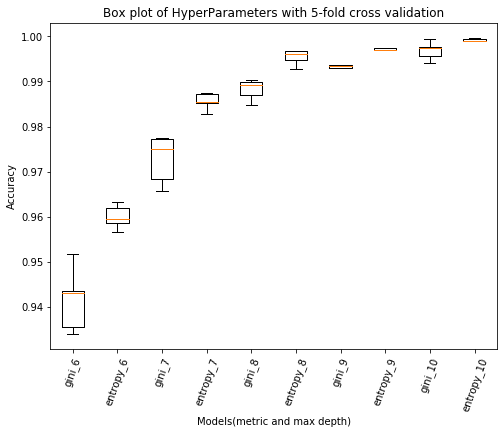

In [6]:

    print('Testing...')
    predicted = bst_rft.predict(test_data.inputs)
    print("\nClassification Report")

    print(classification_report(test_data.targets, predicted))
    print("\nConfusion Matrix")
    print(confusion_matrix(test_data.targets, predicted))




	#clf_rft = clf_rft.fit(X_train, y_train)
	#y_pred_rft=clf_rft.predict(X_test)
    y_train_score_rft=bst_rft.predict(x_train)
    #print("accuracy of the model is:\nTest ", accuracy_score(test_data.targets, predicted, normalize=True, sample_weight=None))
    #print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

	# creating the box plot for model-selection
s = testScores.values()
labels = testScores.keys()
fig = plt.figure(figsize=(8, 6))
plt.boxplot([x for x in s], 0, '', 1)
plt.xticks([y + 1 for y in range(len([x for x in s]))], labels, rotation=70)
plt.xlabel('Models(metric and max depth)')
plt.ylabel('Accuracy')
t = plt.title('Box plot of HyperParameters with 5-fold cross validation')
plt.show()
